<Figure size 640x480 with 0 Axes>

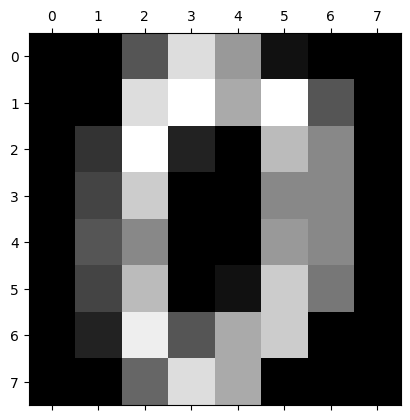

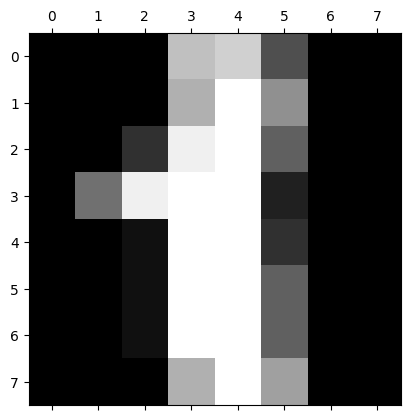

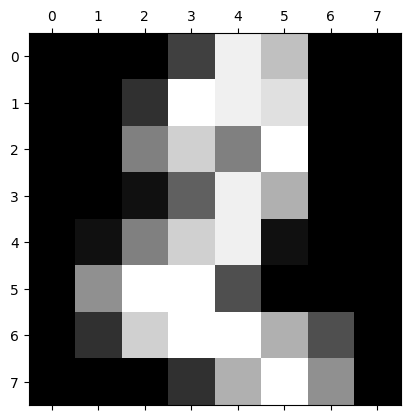

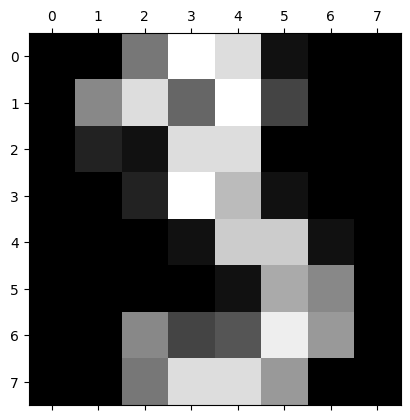

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])


In [11]:
digits.data[:4]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [12]:
df=pd.DataFrame(digits.data)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
df['target']=digits.target

In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis='columns')
y=df['target']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train
y_train


1410    8
1545    0
773     8
526     0
447     7
       ..
946     4
1605    3
835     3
1647    6
1084    2
Name: target, Length: 1437, dtype: int64

In [36]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9722222222222222

In [42]:
y_predict=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  1, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 25,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  1,  1, 31]])

Text(95.72222222222221, 0.5, 'T')

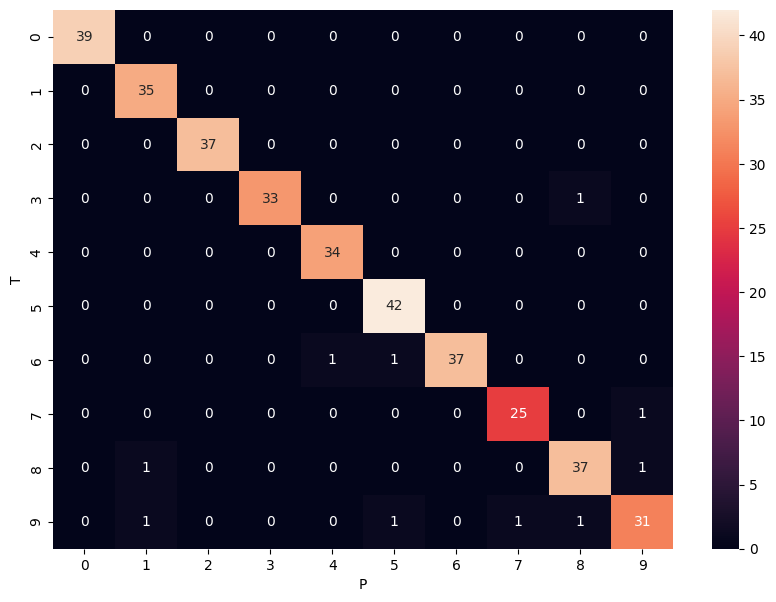

In [46]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('P')
plt.ylabel('T')